In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Classifying Blobs

(100, 2)


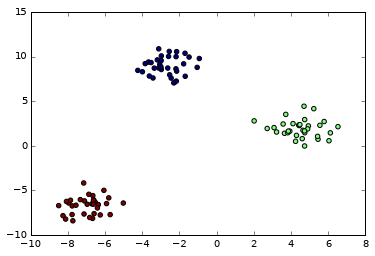

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], 20, y)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
print('Labels:')
print(labels)
print('Data:')
print(y)


Labels:
[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
Data
[2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


# Digets examples

### Classification using (linear) PCA and (nonlinear) Isometric Maps

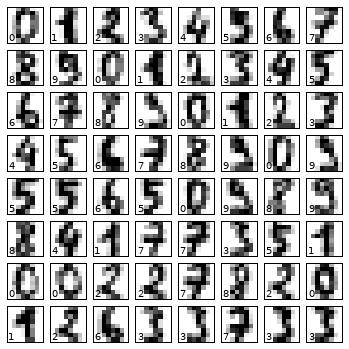

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
fig = plt.figure(figsize=(6, 6))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))

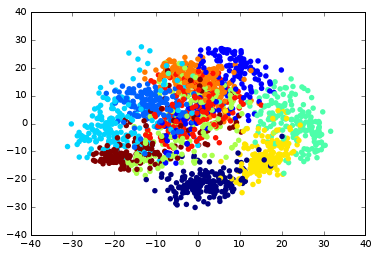

In [16]:
from sklearn.decomposition import RandomizedPCA, PCA
pca = RandomizedPCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], 30, digits.target, edgecolor='none')

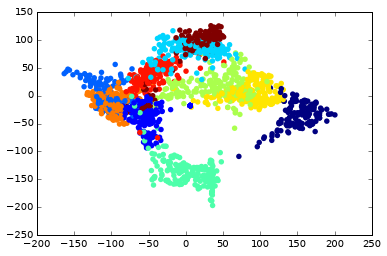

In [21]:
from sklearn.manifold import Isomap
iso = Isomap(n_neighbors=5, n_components=2)
proj = iso.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], 30, digits.target, edgecolor='none')

### Unsuperised learning

Notice that the training labels are unused. The digits have been separated, but they have no meaning.

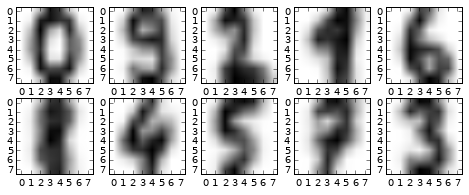

In [17]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit(digits.data)

fig, axs = plt.subplots(2, 5, figsize=(8, 3))
axs = axs.flatten()
for n in range(10):
    axs[n].imshow(kmeans.cluster_centers_[n].reshape(8, 8), cmap=plt.cm.gray_r)

### Supervised learning

Here, we will use the didgit labels to see how well we can reproduce the labels.

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

In [23]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        43
          1       0.72      0.77      0.75        44
          2       0.95      0.55      0.69        33
          3       0.86      0.55      0.67        44
          4       0.95      0.77      0.85        47
          5       0.84      0.88      0.86        52
          6       0.93      1.00      0.96        39
          7       0.60      0.95      0.74        37
          8       0.57      0.86      0.68        58
          9       0.97      0.60      0.74        53

avg / total       0.83      0.79      0.79       450



In [24]:
print(metrics.confusion_matrix(expected, predicted))

[[42  0  0  0  0  0  0  1  0  0]
 [ 0 34  0  0  0  0  1  2  6  1]
 [ 0  5 18  0  0  0  0  0 10  0]
 [ 0  0  0 24  0  4  0  2 14  0]
 [ 0  1  0  0 36  0  2  8  0  0]
 [ 0  0  0  1  1 46  0  3  1  0]
 [ 0  0  0  0  0  0 39  0  0  0]
 [ 0  0  0  0  1  1  0 35  0  0]
 [ 0  3  1  0  0  0  0  4 50  0]
 [ 0  4  0  3  0  4  0  3  7 32]]
